In [1]:
from data.load_data import load_cache_behavior_neuropixel, get_trial_df
import numpy as np
import matplotlib.pyplot as plt # used for plotting data
%matplotlib inline
from numpy import linalg as LA
from numpy.linalg import matrix_rank
from scipy.stats import pearsonr
import my_functions_notebook as mf
import my_functions_for_plots as mf_plots
from scipy.stats import ks_2samp

In [2]:
#In case we need to reload  functions

#import importlib
#importlib.reload(mf)
#importlib.reload(mf_plots)

In [3]:
## VISp CELLS! 50 SESSIONS
my_area = 'VISp'

In [4]:
# Step 1: Import data from the text file into NumPy arrays
angles_between_signal_and_FIRST_noise_ACTIVE = np.loadtxt("../local_code/angles_between_signal_and_FIRST_noise_ACTIVE_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter
angles_between_signal_and_SECOND_noise_ACTIVE = np.loadtxt("../local_code/angles_between_signal_and_SECOND_noise_ACTIVE_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter

angles_between_signal_and_FIRST_noise_PASSIVE = np.loadtxt("../local_code/angles_between_signal_and_FIRST_noise_PASSIVE_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter
angles_between_signal_and_SECOND_noise_PASSIVE = np.loadtxt("../local_code/angles_between_signal_and_SECOND_noise_PASSIVE_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter

angles_between_signal_axes = np.loadtxt("../local_code/angles_between_signal_axes_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter

angles_between_FIRST_noise_axes = np.loadtxt("../local_code/angles_between_FIRST_noise_axes_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter
angles_between_SECOND_noise_axes = np.loadtxt("../local_code/angles_between_SECOND_noise_axes_{}.txt".format(my_area), delimiter=' ')  # Use the appropriate delimiter


In [5]:
aa = angles_between_signal_and_FIRST_noise_ACTIVE.flatten()
aa.shape

(11200,)

In [6]:
angles_between_signal_and_FIRST_noise_ACTIVE.shape

(50, 224)

KS Statistic: 0.0583
KS Test p-value (permutations): 0.0010
Significance Level (alpha): 0.0500
The two datasets are statistically different.


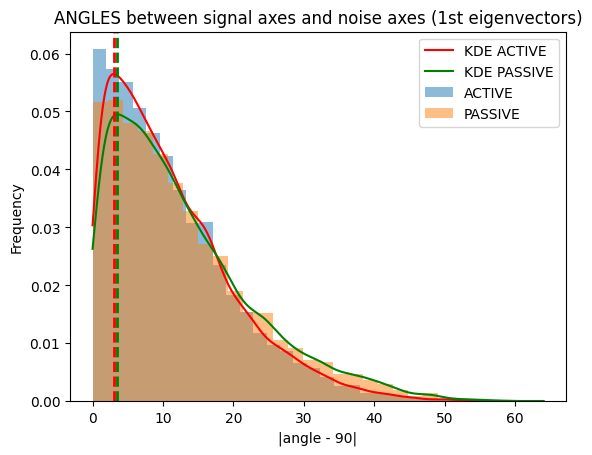

In [7]:
nbins = 30
mf_plots.plot_and_test_histograms(np.abs(angles_between_signal_and_FIRST_noise_ACTIVE.flatten()-90), np.abs(angles_between_signal_and_FIRST_noise_PASSIVE.flatten()-90), nbins, 1000, 0.05, '|angle - 90|', 'ANGLES between signal axes and noise axes (1st eigenvectors)', True)


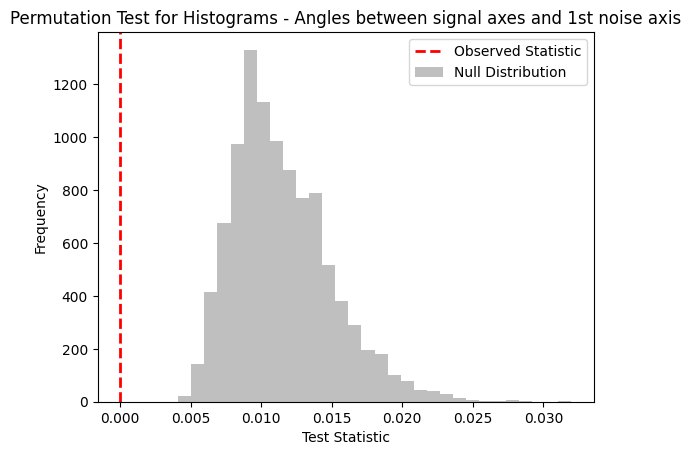

p-value: 1.0000


(1.0, False)

In [8]:
#statistical test
mf_plots.permutation_test_histograms(np.abs(angles_between_signal_and_FIRST_noise_ACTIVE.flatten()-90), np.abs(angles_between_signal_and_FIRST_noise_ACTIVE.flatten()-90), 10000, 0.05, title = 'Permutation Test for Histograms - Angles between signal axes and 1st noise axis')

KS Statistic: 0.0182
KS Test p-value (permutations): 0.0579
Significance Level (alpha): 0.0500
There is no significant difference between the two datasets.


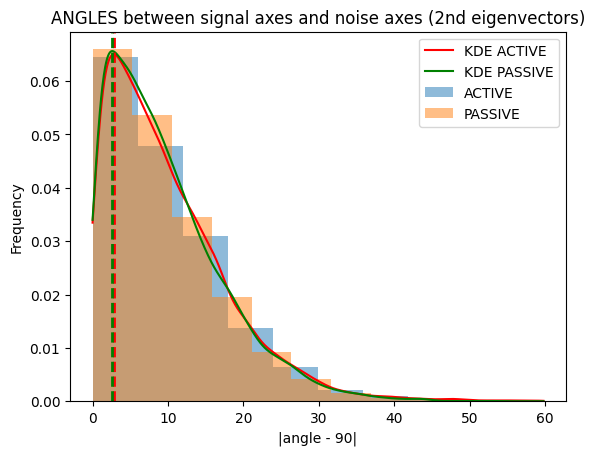

In [9]:
nbins_2 = 10
mf_plots.plot_and_test_histograms(np.abs(angles_between_signal_and_SECOND_noise_ACTIVE.flatten()-90), np.abs(angles_between_signal_and_SECOND_noise_PASSIVE.flatten()-90), nbins_2, 1000, 0.05, '|angle - 90|', 'ANGLES between signal axes and noise axes (2nd eigenvectors)', True)


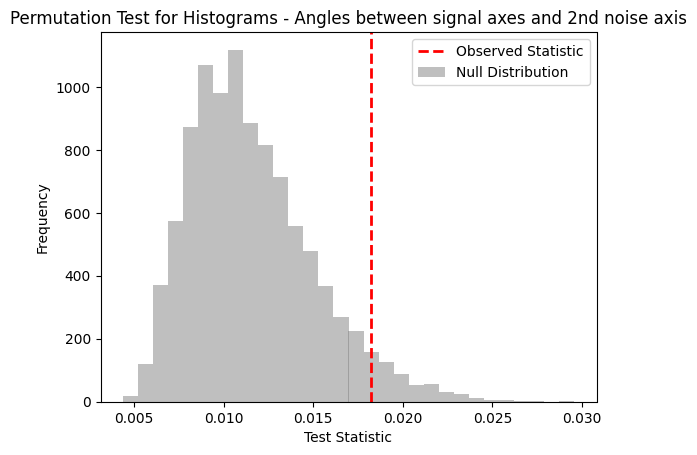

p-value: 0.0499


(0.04989501049895011, True)

In [10]:
#statistical test
mf_plots.permutation_test_histograms(np.abs(angles_between_signal_and_SECOND_noise_ACTIVE.flatten()-90), np.abs(angles_between_signal_and_SECOND_noise_PASSIVE.flatten()-90), 10000, 0.05, title = 'Permutation Test for Histograms - Angles between signal axes and 2nd noise axis')

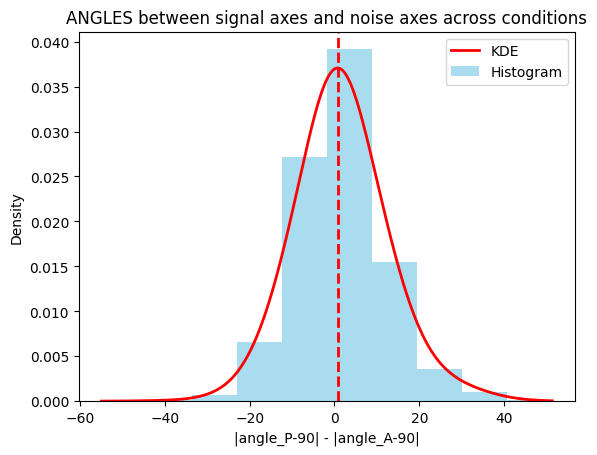

In [11]:
#pair differences between angles
pair_differences = np.abs(angles_between_signal_and_FIRST_noise_PASSIVE.flatten()-90) - np.abs(angles_between_signal_and_FIRST_noise_ACTIVE.flatten()-90)
#pair_differences = (np.abs(all_angles_PASSIVE-90) - np.abs(all_angles_ACTIVE - 90))
mf_plots.fit_and_plot_histogram(pair_differences, xlabel='|angle_P-90| - |angle_A-90|', title='ANGLES between signal axes and noise axes across conditions', num_bins=10)

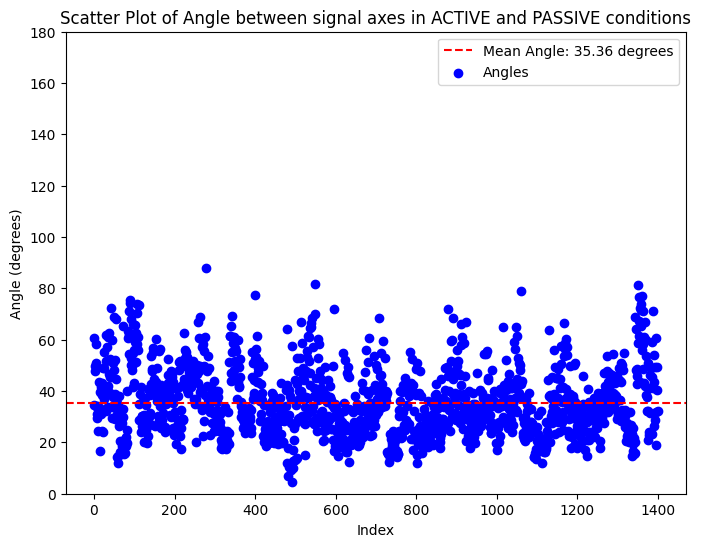

In [12]:
#ROTATION of SIGNAL AXES

angles_signal_axes_ACT_PASS = angles_between_signal_axes.flatten()

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
index = np.arange(0,len(angles_signal_axes_ACT_PASS))
plt.scatter(index, angles_signal_axes_ACT_PASS, c='blue', marker='o', label='Angles')

mean_angle = np.mean(angles_signal_axes_ACT_PASS)
# Add a dashed line for the mean
plt.axhline(mean_angle, color='red', linestyle='--', label=f'Mean Angle: {mean_angle:.2f} degrees')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Angle (degrees)')
plt.title('Scatter Plot of Angle between signal axes in ACTIVE and PASSIVE conditions')
#plt.grid(True)
plt.legend()
plt.ylim(0, 180)
# Show the plot
plt.show()

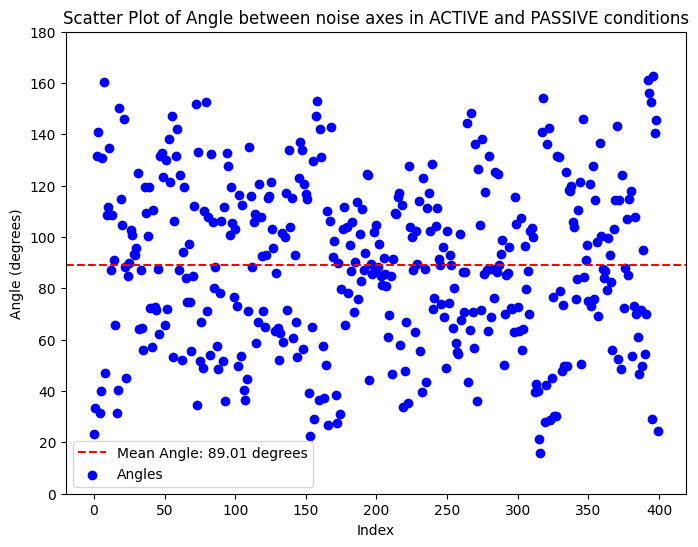

In [13]:
#ROTATION of NOISE AXES

angles_noise_axes_ACT_PASS_1 = angles_between_FIRST_noise_axes.flatten()
angles_noise_axes_ACT_PASS_2 = angles_between_SECOND_noise_axes.flatten()

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
index = np.arange(0,len(angles_noise_axes_ACT_PASS_1))
plt.scatter(index, angles_noise_axes_ACT_PASS_1, c='blue', marker='o', label='Angles')

mean_angle_noise = np.mean(angles_noise_axes_ACT_PASS_1)
# Add a dashed line for the mean
plt.axhline(mean_angle_noise, color='red', linestyle='--', label=f'Mean Angle: {mean_angle_noise:.2f} degrees')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Angle (degrees)')
plt.title('Scatter Plot of Angle between noise axes in ACTIVE and PASSIVE conditions')
#plt.grid(True)
plt.legend()
plt.ylim(0, 180)
# Show the plot
plt.show()

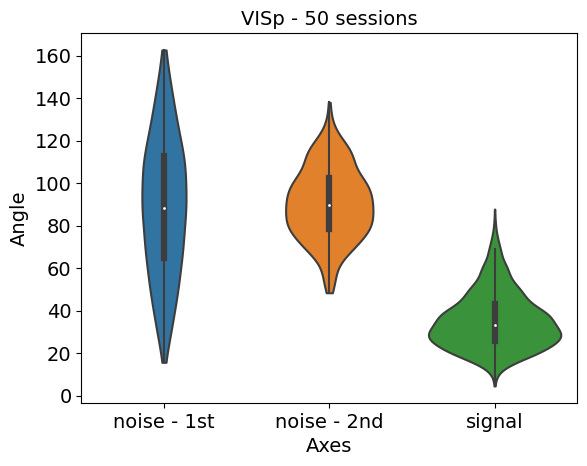

In [20]:
data = list()
for el in angles_noise_axes_ACT_PASS_1:
    data.append( dict(variable="noise - 1st", angle=el) )

for el in angles_noise_axes_ACT_PASS_2:
    data.append( dict(variable="noise - 2nd", angle=el) )

for el in angles_signal_axes_ACT_PASS:
    data.append( dict(variable="signal", angle=el) )
    
data_only_first = list()
for el in angles_noise_axes_ACT_PASS_1:
    data_only_first.append( dict(variable="noise - 1st", angle=el) )

for el in angles_signal_axes_ACT_PASS:
    data_only_first.append( dict(variable="signal", angle=el) )
    
import pandas as pd
import seaborn as sns

df = pd.DataFrame( data )
df_only_first = pd.DataFrame( data_only_first )

sns.violinplot(data=df, x="variable", y="angle", cut=0)
# Set x-label, y-label, and font size
plt.xlabel('Axes', fontsize=14)
plt.ylabel('Angle', fontsize=14)
plt.xticks(fontsize=14)  # Adjust the x-axis tick label font size
plt.yticks(fontsize=14)  # Adjust the y-axis tick label font size
plt.title('VISp - 50 sessions', fontsize=14)

# Save the plot to a file (e.g., PNG)
plt.savefig('violin_VISp.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='angle'>

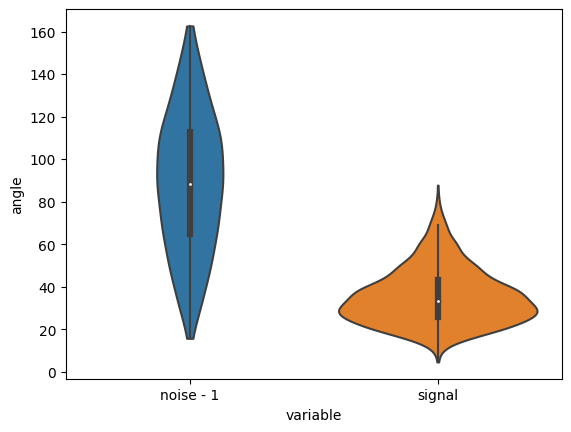

In [15]:
sns.violinplot(data=df_only_first, x="variable", y="angle", cut=0)